Preparing the data

In [1]:
#Import important libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:


# Importing the CSV file from google drive
from google.colab import drive

#'https://drive.google.com/file/d/1_7_-glZ1GsjuFXG2Xwlv_Ar2LWI7rKr1/view?usp=sharing'

url = 'https://drive.google.com/file/d/1_7_-glZ1GsjuFXG2Xwlv_Ar2LWI7rKr1/view?usp=sharingg'
file_id = url.split('/')[-2]
drive = 'https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(drive)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


Data Processing

In [3]:
#Checking for Null
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [4]:
#Taking care of missing data


# .mode fills the column with the most frequent Value, This can be use for data that arent numerical
# .mean fills the column with the mean of that column

#df[''] = df[''].fillna(df[''].mode()[0])
#df[''] = df[''].fillna(df[''].mean())


#Checking for Null
df.isna().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<ipython-input-5-3599641d3254>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


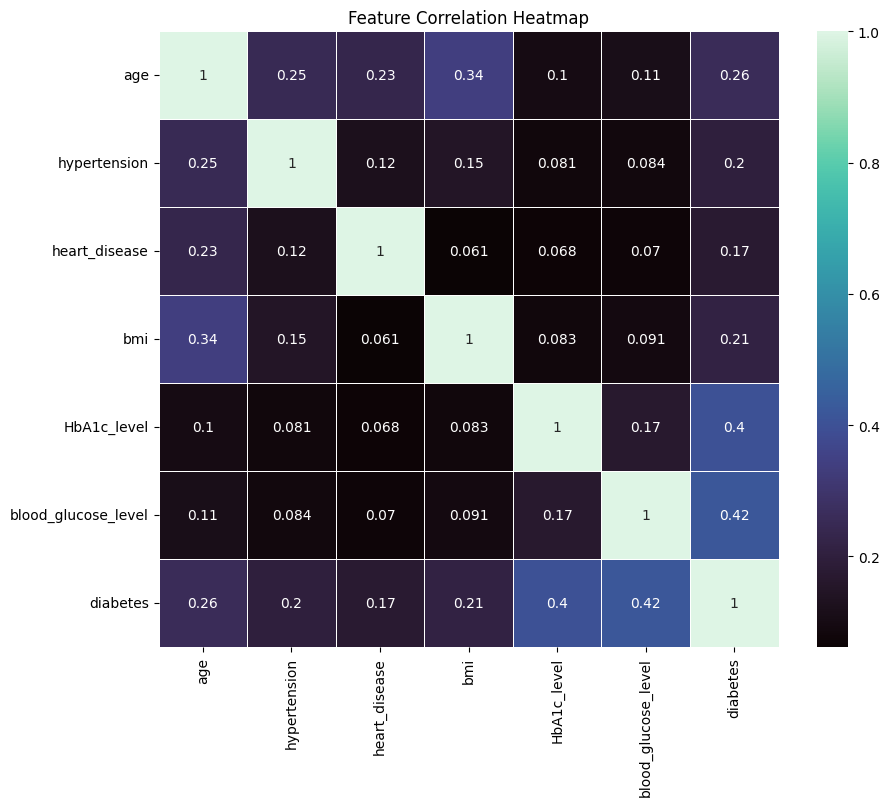

In [5]:
#heatmap

import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='mako', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#if the correlation is negative, it is not related


In [6]:
# Encoding categorical data
# X is independent
# Y is dependent

#Values [Slice, Columns]
#.drop drops the inputed column

df = df.drop(['gender','smoking_history'], axis=1)

X = df.drop('diabetes', axis =1)
y = df['diabetes']

print("The values of X are",X)

print("The values of Y are",y)

The values of X are         age  hypertension  heart_disease    bmi  HbA1c_level  \
0      80.0             0              1  25.19          6.6   
1      54.0             0              0  27.32          6.6   
2      28.0             0              0  27.32          5.7   
3      36.0             0              0  23.45          5.0   
4      76.0             1              1  20.14          4.8   
...     ...           ...            ...    ...          ...   
99995  80.0             0              0  27.32          6.2   
99996   2.0             0              0  17.37          6.5   
99997  66.0             0              0  27.83          5.7   
99998  24.0             0              0  35.42          4.0   
99999  57.0             0              0  22.43          6.6   

       blood_glucose_level  
0                      140  
1                       80  
2                      158  
3                      155  
4                      155  
...                    ...  
99995   

In [7]:
X.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,80.0,0,1,25.19,6.6,140
1,54.0,0,0,27.32,6.6,80
2,28.0,0,0,27.32,5.7,158
3,36.0,0,0,23.45,5.0,155
4,76.0,1,1,20.14,4.8,155


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [9]:
# Splitting Train and Test values
from sklearn.model_selection import train_test_split

#Dividing the dataset into 80% Training and 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state= 1)

print("X Train:\n",X_train,"X Test:\n",X_test,"Y Train:\n",y_train,"Y Test:\n",y_test)

X Train:
         age  hypertension  heart_disease    bmi  HbA1c_level  \
78689  48.0             0              0  36.26          4.0   
76423  50.0             0              0  30.68          5.8   
86945  63.0             0              0  38.19          3.5   
57427  36.0             0              0  34.55          4.0   
34616  39.0             0              0  33.55          5.8   
...     ...           ...            ...    ...          ...   
50057  36.0             0              0  27.32          5.8   
98047  18.0             0              0  19.02          3.5   
5192   80.0             1              0  28.36          5.8   
77708  51.0             1              0  57.51          6.2   
98539  79.0             0              0  27.32          6.0   

       blood_glucose_level  
78689                  130  
76423                  155  
86945                  200  
57427                   90  
34616                  200  
...                    ...  
50057             

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

SVM

In [11]:
# import svc
from sklearn.svm import SVC

# Creating a instance
classifier = SVC(kernel='rbf',random_state=None)

# Fitting the model
classifier.fit(X_train, y_train)

SVC()

In [12]:
classifier.intercept_

array([0.21910157])

In [13]:
classifier.n_support_

array([3381, 3243], dtype=int32)

In [14]:
# Predicting the values
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)
print(cm_train)

cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)

[[73126    75]
 [ 2729  4070]]
[[18277    22]
 [  676  1025]]


In [16]:
# Accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
print((accuracy_train)*100, '%')

96.495 %


In [21]:
import numpy as np

# Collect user input for the 12 features
age = float(input("Enter Age: "))
hypertension = float(input("Enter Hypertension (0 or 1): "))
heart_disease = float(input("Enter Heart Disease (0 or 1): "))

bmi = float(input("Enter BMI: "))
HbA1c_level = float(input("Enter HbA1c level: "))
blood_glucose_level = float(input("Enter Blood Glucose Level: "))


# Organize user input into a numpy array
user_input = np.array([age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level,
                      ]).reshape(1, -1)

# Scale the user input using the same StandardScaler used for the training data
user_input_scaled = sc.transform(user_input)  # Assuming 'sc' is the StandardScaler object used in training

# Make a prediction using the trained SVM model
prediction = classifier.predict(user_input_scaled)  # Assuming 'classifier' is the trained SVM model

# Print the prediction
if prediction == 1:
    print("The user has Diabetes.")
else:
    print("The user does not have Diabetes.")



Enter Age: 66
Enter Hypertension (0 or 1): 1
Enter Heart Disease (0 or 1): 0
Enter BMI: 31.28
Enter HbA1c level: 3.5
Enter Blood Glucose Level: 80
The user does not have Diabetes.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:
import joblib

# Save the trained SVM model to a file
joblib.dump(classifier, 'svm_model.pkl')

# Save the StandardScaler object to a file
joblib.dump(sc, 'scaler.pkl')

['scaler.pkl']